In [2]:
%load_ext autoreload
%autoreload 2

# Zugriff auf die Funktionen in utils.py
import utils

In [3]:
# import der notwendigen Funktionen für Data Loading
from utils import read_file

In [4]:
# Definieren des Dateipfads und des Event-Typs
file_name = 'data/Events_Match_Test_TEAM_A_vs_TEAM_B.csv'
event_type = 'Shifts'

# Laden der Daten mit der read_file Funktion aus utils.py
df = read_file(file_name, event_type)

# Ersetzen der 'Name' Werte
df['Name'] = df['Name'].str.replace('TEST', 'Team A')
df['Name'] = df['Name'].str.replace('Guest', 'Team B')

# Anzeigen der ersten Zeilen des DataFrame zur Überprüfung
df.head()

,Timestamp (ms),Timestamp in local format,Player ID,Name,Event type,Duration (s),Distance,Distance (speed | Very low),Distance (speed | Low),Distance (speed | Medium),Distance (speed | High),Distance (speed | Very high),Distance (speed | Sprint),Distance (speed | 0 - 0 km/h),Metabolic Power (Ø),Speed (max.),Skating Load,Skating Intensity
0,1670697995000,12/10/2022;07:46:35.000 PM,438,D Team A,Shift,34.707001,114.0,29.0,15,25,36,9,0.0,NaN,321.93,22.60,21.67,37.45
1,1670697995000,12/10/2022;07:46:35.000 PM,443,D Team A,Shift,43.952999,177.0,25.0,21,39,51,36,4.0,NaN,382.01,24.34,28.74,39.24
4,1670697995000,12/10/2022;07:46:35.000 PM,470,D3 Team B,Shift,82.765999,288.0,45.0,83,70,87,3,0.0,NaN,331.98,21.88,51.74,37.51
7,1670697995000,12/10/2022;07:46:35.000 PM,471,D4 Team B,Shift,57.615002,215.0,34.0,29,59,79,14,0.0,NaN,360.89,21.75,46.27,48.18
11,1670697995000,12/10/2022;07:46:35.000 PM,448,FW Team A,Shift,20.010000,1.0,1.0,0,0,0,0,0.0,NaN,9.38,4.64,0.49,1.47


In [5]:
from utils import find_optimal_amount_of_shifts

# Bestimmen der optimalen Anzahl von Shifts
optimal_shifts, _ = find_optimal_amount_of_shifts(df, simple=True, verbose=False)
print(f"Optimale Anzahl von Shifts - simple: {optimal_shifts}")

optimal_shifts, _ = find_optimal_amount_of_shifts(df, simple=False, verbose=False)
print(f"Optimale Anzahl von Shifts - elbow: {optimal_shifts}")

Optimale Anzahl von Shifts - simple: 143
Optimale Anzahl von Shifts - elbow: 91


In [6]:
# Check for required columns
if not {"Timestamp (ms)", "Duration (s)", "Player ID", "Skating Intensity"}.issubset(df.columns):
    raise ValueError("The DataFrame does not contain the necessary columns for visualization.")
else:
    print("All required columns are present in the DataFrame.")
    
# Remove goalkeepers    
df = df[~df["Name"].str.contains("Goalkeeper")]

# Choose team
df_teamB = df[df["Name"].str.contains("Team B")]
df_teamA = df[df["Name"].str.contains("Team A")]

All required columns are present in the DataFrame.


#### Team A

Shift Intensities using simple method


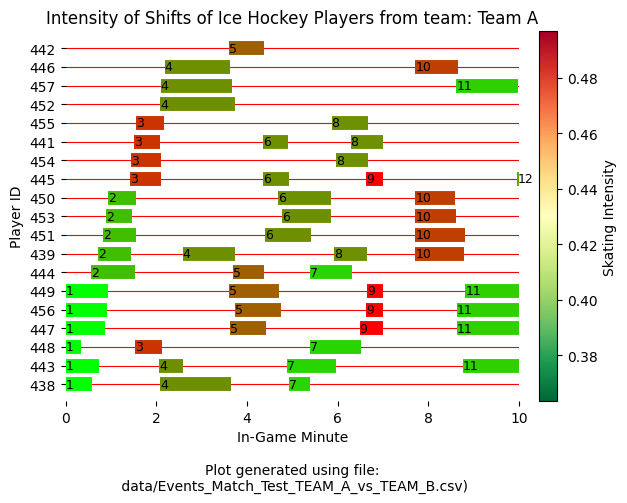

Shift Intensities using elbow method


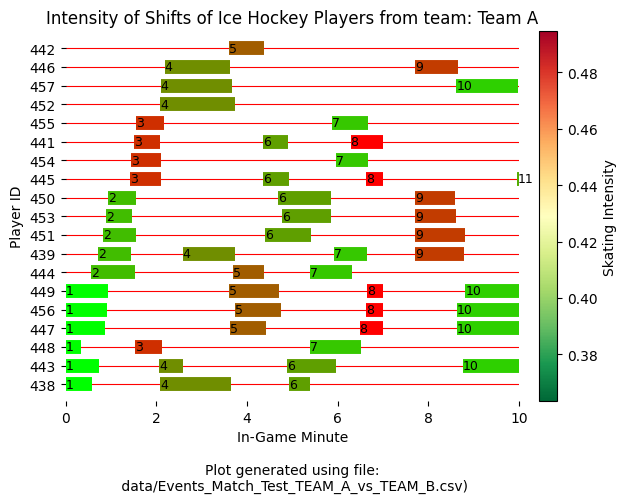

In [7]:
from utils import generate_block_config, plot_shifts_with_intensity

# Generieren der Block-Konfiguration für die Visualisierung
block_config = generate_block_config(
    naive=True,  # Oder False, je nach Analyse
    verbose=False,
    team_name="Team A",
    file_name_raw_data=file_name,
    file_name_save_plot=None  # Optional
)

# Erstellen der Visualisierung mit der naiven Methode
print("Shift Intensities using simple method")
df_teamA_intensities = plot_shifts_with_intensity(
    df_teamA, 
    block_config,
    time_window_start=0,  # Startzeit in Spielminuten
    time_window_duration=10,  # Dauer des zu visualisierenden Fensters in Minuten
    intensity_indicator="Skating Intensity"  # Die genaue Spalte in deinem df
)

# Zum Vergleich, die Shifts mit der elbow-method
print("Shift Intensities using elbow method")
block_config[utils.BLOCK_CONFIG_NOF_SHIFTS_DESCRIPTOR] = False
_ = plot_shifts_with_intensity(
    df_teamA, 
    block_config,
    time_window_start=0,  # Startzeit in Spielminuten
    time_window_duration=10,  # Dauer des zu visualisierenden Fensters in Minuten
    intensity_indicator="Skating Intensity"  # Die genaue Spalte in deinem df
)

#### Team B

Shift Intensities using simple method


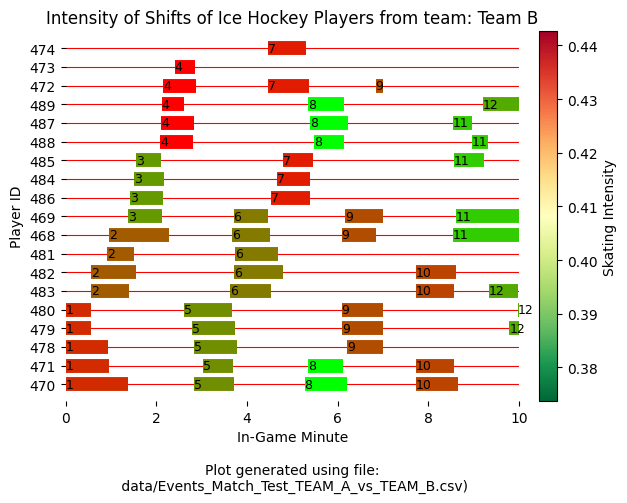

Shift Intensities using elbow method


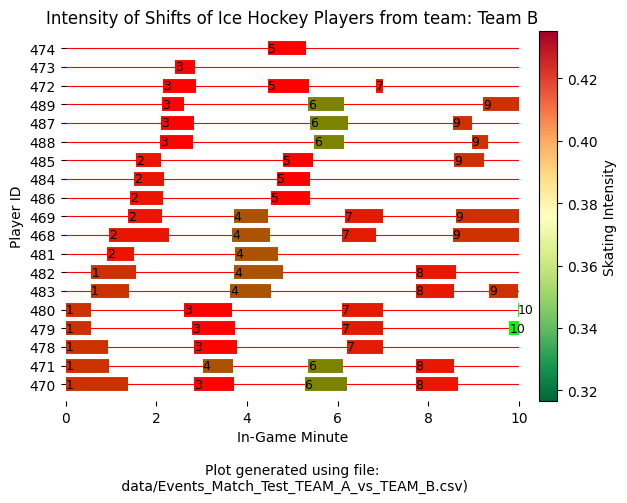

In [8]:
# Generieren der Block-Konfiguration für die Visualisierung
block_config = generate_block_config(
    naive=True,  # Oder False, je nach Analyse
    verbose=False,
    team_name="Team B",
    file_name_raw_data=file_name,
    file_name_save_plot=None  # Optional
)

# Erstellen der Visualisierung mit der naiven Methode
print("Shift Intensities using simple method")
df_teamB_intensities = plot_shifts_with_intensity(
    df_teamB, 
    block_config,
    time_window_start=0,  # Startzeit in Spielminuten
    time_window_duration=10,  # Dauer des zu visualisierenden Fensters in Minuten
    intensity_indicator="Skating Intensity"  # Die genaue Spalte in deinem df
)

# Zum Vergleich, die Shifts mit der elbow-method
print("Shift Intensities using elbow method")
block_config[utils.BLOCK_CONFIG_NOF_SHIFTS_DESCRIPTOR] = False
_ = plot_shifts_with_intensity(
    df_teamB, 
    block_config,
    time_window_start=0,  # Startzeit in Spielminuten
    time_window_duration=10,  # Dauer des zu visualisierenden Fensters in Minuten
    intensity_indicator="Skating Intensity"  # Die genaue Spalte in deinem df
)

#### SIS Team A vs. Team B

Team B

In [42]:
    # Filter DataFrame for guest players excluding goalkeepers
    df_filtered = df[df["Name"].str.contains("B") & ~df["Name"].str.contains("Goalkeeper")].copy()

In [43]:
    # Finding the optimal number of shifts
    
    optimal_shifts, shift_labels = find_optimal_amount_of_shifts(df_filtered, True, False)

In [20]:
    # Preparing data for clustering
    data_for_clustering = df_filtered[["Timestamp (ms)", "Duration (s)"]]

In [22]:
from sklearn.cluster import KMeans

In [23]:
    # Clustering with KMeans
    kmeans = KMeans(n_clusters=optimal_shifts)
    kmeans.fit(data_for_clustering)

KMeans(n_clusters=71)

In [25]:
    # Adding cluster labels
    df_filtered["Shift_Label"] = kmeans.labels_

In [26]:
    # Calculating average intensity for each shift
    df_filtered['Average_Shift_Intensity'] = df_filtered.groupby('Shift_Label')['Skating Intensity'].transform('mean')

In [27]:
    # Average intensity of all shifts for each player
    player_shift_means = df_filtered.groupby(['Name', 'Shift_Label'])['Skating Intensity'].mean().reset_index()
    player_average_intensity = player_shift_means.groupby('Name')['Skating Intensity'].mean()

In [32]:
    # Average value of intensities for all shifts of all players
    overall_average_shift_intensity = player_shift_means['Skating Intensity'].mean()

        # Calculating SIS for each player
    player_sis = player_average_intensity / overall_average_shift_intensity

        # Adding the SIS to df_filtered
    df_filtered['SIS'] = df_filtered['Name'].map(player_sis)

    # order the shifts
    df_filtered = utils.order_block_labels(df_filtered)

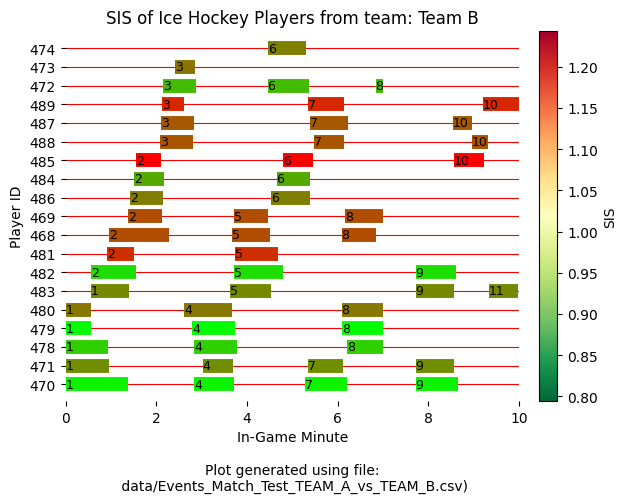

In [41]:
from utils import plot_SIS

# Setze die Größe der Figur außerhalb der Funktion
#plt.figure(figsize=(20, 6))

# Plot SIS for Team A
plot_SIS(df_filtered, 
         0,
         10,
         team_name="Team A",
         file_name_raw_data=file_name
         )


# Plot SIS for Team B
plot_SIS(df_filtered, 
         0,
         10,
         team_name="Team B",
         file_name_raw_data=file_name
         )



TypeError: get_colour() takes 1 positional argument but 3 were given

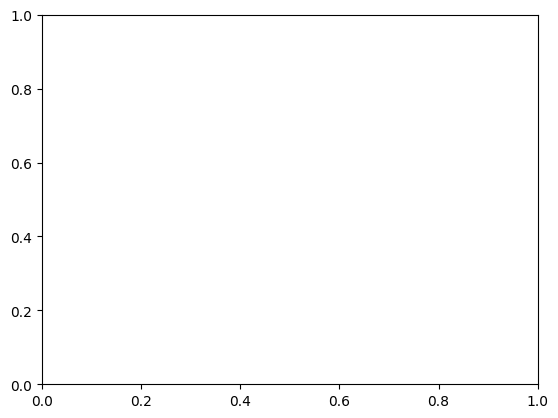

In [70]:
def get_colour(intensity: int) -> str:
    """
    creates a colour between green and red  according to intensity

    :param intensity: hockey intensity within [0,1]
    :return: linear interpolation between green = easy and red = heavy in hex-format, e.g. #FF0000
    """

    # LERP between green and red
    green = int((1 - intensity) * 255)
    red = int(intensity * 255)

    colour = "#%02x%02x%02x" % (red, green, 0)  # blue value is 0
    return colour



# Plot SIS for Team B
plot_SIS(df_filtered, 
         0,
         10,
         team_name="Team B",
         file_name_raw_data=file_name
         )


In [48]:
import pandas as pd

def plot_SIS(df: pd.DataFrame,
             starting_minute: int,
             time_window: int,
             team_name: str = None,
             file_name_raw_data: str = None,
             file_name_save_plot: str = None):
    """
    Creates plot with shifts of all players together with the intensity of all individual shifts

    df requires 3 columns:
        timestamp: datetime -> start of a shift of a player
        time: timedelta -> duration of a shift of a player in seconds
        SIS: float -> a relative intensity of a shift for a player between 0 and 1

    :param df: dataframe with shift data
    :param starting_minute:  What minute (in-game-time) does the plot start?
    :param time_window:  how much time should be plotted? (in minutes)
    :param team_name: team name for plot labelling
    :param file_name_raw_data: path to file for plot description
    :param file_name_save_plot: If given, plot is saved to this file. Ending should be ".png".
    :return:
    """

    # create plot
    fig, ax = plt.subplots()

    # create correct time formats
    df["timestamp"] = pd.to_datetime(df["Timestamp (ms)"], unit="ms")
    df["time"] = pd.to_timedelta(df["Duration (s)"], unit="sec")
    start_time = df['timestamp'].min()
    df['Time Since Start'] = (df['timestamp'] - start_time).dt.total_seconds() / 60

    # plot bars
    for i in df.index:
        start_minute = df['Time Since Start'][i]
        end_minute = start_minute + df['time'][i].total_seconds() / 60

        if end_minute > starting_minute + time_window:
            continue

        ax.plot([start_minute, end_minute],
                [str(df['Player ID'][i]), str(df['Player ID'][i])],
                linewidth=10,
                c=get_colour(df["SIS"][i],
                             df["SIS"].min(),
                             df["SIS"].max()),
                solid_capstyle="butt")

        text(start_minute, str(df['Player ID'][i]), df['Shift_Label'][i], fontsize=9, ha='left', va='center', color='black')

    # format date on x axis
    plt.xlim(starting_minute, starting_minute + time_window)

    # some configurations for background
    ax.grid(axis="y", color="r")
    ax.set(frame_on=False)

    # label axes
    if team_name:
        plt.title(
            f"SIS of Ice Hockey Players from team: {team_name}")
    else:
        plt.title("SIS of Ice Hockey Players ")

    if file_name_raw_data:
        plt.xlabel(f"In-Game Minute\n\nPlot generated using file:\n {file_name_raw_data})")
    else:
        plt.xlabel("In-Game Minute")

    plt.ylabel("Player ID")

    # Add legend for intensity
    norm = mcolors.Normalize(vmin=df["SIS"].min(), vmax=df["SIS"].max())
    sm = cm.ScalarMappable(norm=norm, cmap=cm.RdYlGn_r)
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, orientation='vertical', fraction=0.046, pad=0.04)
    cbar.set_label('SIS')

    # Save plot if file_name_save_plot is given
    if file_name_save_plot:
        plt.savefig(file_name_save_plot, dpi=300, bbox_inches="tight")

    plt.show()

Team A

In [63]:
    # Filter DataFrame for guest players excluding goalkeepers
    df_filtered1 = df[df["Name"].str.contains("A") & ~df["Name"].str.contains("Goalkeeper")].copy()

        # Finding the optimal number of shifts
    
    optimal_shifts, shift_labels = find_optimal_amount_of_shifts(df_filtered1, True, False)

    # Preparing data for clustering
    data_for_clustering = df_filtered1[["Timestamp (ms)", "Duration (s)"]]

    # Clustering with KMeans
    kmeans = KMeans(n_clusters=optimal_shifts)
    kmeans.fit(data_for_clustering)

    # Adding cluster labels
    df_filtered1["Shift_Label"] = kmeans.labels_

    # Calculating average intensity for each shift
    df_filtered1['Average_Shift_Intensity'] = df_filtered1.groupby('Shift_Label')['Skating Intensity'].transform('mean')

    # Average intensity of all shifts for each player
    player_shift_means = df_filtered1.groupby(['Name', 'Shift_Label'])['Skating Intensity'].mean().reset_index()
    player_average_intensity = player_shift_means.groupby('Name')['Skating Intensity'].mean()

In [65]:
    # Average value of intensities for all shifts of all players
    overall_average_shift_intensity = player_shift_means['Skating Intensity'].mean()

        # Calculating SIS for each player
    player_sis = player_average_intensity / overall_average_shift_intensity

        # Adding the SIS to df_filtered
    df_filtered1['SIS'] = df_filtered['Name'].map(player_sis)

    # order the shifts
    df_filtered1 = utils.order_block_labels(df_filtered1)

NameError: name 'get_colour' is not defined

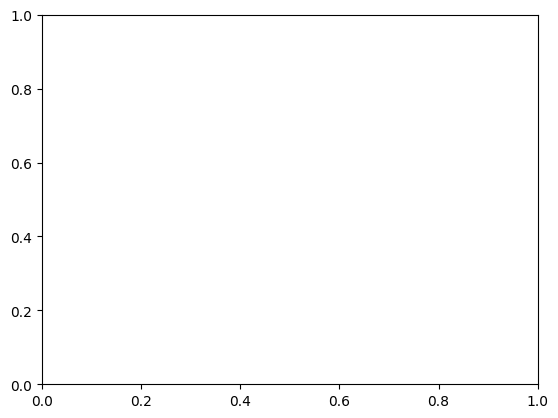

In [67]:
# Plot SIS for Team A
plot_SIS(df_filtered1, 
         0,
         10,
         team_name="Team A",
         file_name_raw_data=file_name
         )